# Cup World Qatar 
## Rank the best performing teams 

In [84]:
import pandas as pd
base = pd.read_csv('world_cup_2022_catar.csv')
base.head(7)

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,...,duels_won_home,duels_won_away,prediction_team_home_win,prediction_draw,prediction_team_away_win,prediction_quantity,location,events_list,lineup_home,lineup_away
0,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,58%,...,55%,45%,40%,5%,55%,672574,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 17' "",...","[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ..."
1,Quarter-finals,10/12/2022,False,False,False,Morocco,Portugal,1,0,26%,...,48%,52%,33%,3%,64%,641150,Al Thumama Stadium,"[{'event_team': 'home', 'event_time': "" 42' "",...","[{'player_name': ' Boufal ', 'player_number': ...","[{'player_name': ' Félix ', 'player_number': '..."
2,Quarter-finals,09/12/2022,True,3,4,Netherlands,Argentina,2,2,52%,...,45%,55%,24%,3%,73%,690888,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 35' "",...","[{'player_name': ' Memphis ', 'player_number':...","[{'player_name': ' Álvarez ', 'player_number':..."
3,Quarter-finals,09/12/2022,True,4,2,Croatia,Brazil,1,1,51%,...,55%,45%,11%,3%,86%,646999,Education City Stadium,"[{'event_team': 'away', 'event_time': "" 25' "",...","[{'player_name': ' Perišić ', 'player_number':...","[{'player_name': ' Richarlison ', 'player_numb..."
4,Round of 16,06/12/2022,False,False,False,Portugal,Switzerland,6,1,47%,...,57%,44%,80%,3%,17%,487290,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 17' "",...","[{'player_name': ' Félix ', 'player_number': '...","[{'player_name': ' Shaqiri ', 'player_number':..."
5,Round of 16,06/12/2022,True,3,0,Morocco,Spain,0,0,23%,...,55%,45%,34%,3%,63%,463912,Education City Stadium,"[{'event_team': 'away', 'event_time': "" 63' "",...","[{'player_name': ' Boufal ', 'player_number': ...","[{'player_name': ' Olmo ', 'player_number': ' ..."
6,Round of 16,05/12/2022,False,False,False,Brazil,South Korea,4,1,54%,...,46%,54%,90%,2%,8%,610645,Stadium 974,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Richarlison ', 'player_numb...","[{'player_name': ' Son Heung-min ', 'player_nu..."


## Check for empty fields

In [85]:
base.isnull().sum()

stage                       0
date                        0
pens                        0
pens_home_score             0
pens_away_score             0
team_name_home              0
team_name_away              0
team_home_score             0
team_away_score             0
possession_home             0
possession_away             0
total_shots_home            0
total_shots_away            0
shots_on_target_home        0
shots_on_target_away        0
duels_won_home              0
duels_won_away              0
prediction_team_home_win    0
prediction_draw             0
prediction_team_away_win    0
prediction_quantity         0
location                    0
events_list                 0
lineup_home                 0
lineup_away                 0
dtype: int64

## Removing Columns

In [86]:
remove_columns = ['stage','date','pens','pens_home_score',
                  'pens_away_score','possession_home','possession_away','total_shots_home',
                  'total_shots_away','shots_on_target_home','shots_on_target_away','duels_won_home',
                  'duels_won_away','prediction_team_home_win','prediction_draw','prediction_team_away_win',
                  'prediction_quantity','location','events_list','lineup_home','lineup_away']
base = base.drop(remove_columns, axis=1)                   
base.head(7)

,team_name_home,team_name_away,team_home_score,team_away_score
0,England,France,1,2
1,Morocco,Portugal,1,0
2,Netherlands,Argentina,2,2
3,Croatia,Brazil,1,1
4,Portugal,Switzerland,6,1
5,Morocco,Spain,0,0
6,Brazil,South Korea,4,1


In [87]:
base.loc[(base.team_home_score < base.team_away_score),'team_victory'] = base.team_name_away
base.head(7)

,team_name_home,team_name_away,team_home_score,team_away_score,team_victory
0,England,France,1,2,France
1,Morocco,Portugal,1,0,NaN
2,Netherlands,Argentina,2,2,NaN
3,Croatia,Brazil,1,1,NaN
4,Portugal,Switzerland,6,1,NaN
5,Morocco,Spain,0,0,NaN
6,Brazil,South Korea,4,1,NaN


In [88]:
base.loc[(base.team_home_score > base.team_away_score),'team_victory'] = base.team_name_home
base.head(7)

,team_name_home,team_name_away,team_home_score,team_away_score,team_victory
0,England,France,1,2,France
1,Morocco,Portugal,1,0,Morocco
2,Netherlands,Argentina,2,2,NaN
3,Croatia,Brazil,1,1,NaN
4,Portugal,Switzerland,6,1,Portugal
5,Morocco,Spain,0,0,NaN
6,Brazil,South Korea,4,1,Brazil


In [89]:
base.loc[(base.team_home_score == base.team_away_score),'team_victory'] = 'Draw'
base.head(7)

,team_name_home,team_name_away,team_home_score,team_away_score,team_victory
0,England,France,1,2,France
1,Morocco,Portugal,1,0,Morocco
2,Netherlands,Argentina,2,2,Draw
3,Croatia,Brazil,1,1,Draw
4,Portugal,Switzerland,6,1,Portugal
5,Morocco,Spain,0,0,Draw
6,Brazil,South Korea,4,1,Brazil


In [90]:
base.team_victory.value_counts()

Draw            14
France           4
Portugal         3
Brazil           3
England          3
Argentina        3
Netherlands      3
Morocco          3
Japan            2
Australia        2
Switzerland      2
Senegal          2
Belgium          1
Iran             1
Spain            1
Croatia          1
Saudi Arabia     1
Poland           1
Costa Rica       1
Mexico           1
Ghana            1
USA              1
Tunisia          1
Germany          1
Uruguay          1
South Korea      1
Cameroon         1
Ecuador          1
Name: team_victory, dtype: int64

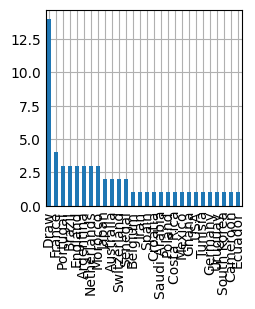

In [91]:
import matplotlib.pyplot as plt
base.team_victory.value_counts().plot.bar();

In [92]:
base.to_csv('Best_teams_result.csv')
print('File created with sucess!')

File created with sucess!


## Training and Evaluating the model

In [93]:
base['team_name_home'].value_counts()

England         4
Netherlands     4
Croatia         3
Portugal        3
Brazil          3
Japan           3
France          3
Argentina       3
Morocco         3
Poland          2
Qatar           2
Wales           2
Tunisia         2
South Korea     2
Belgium         2
Cameroon        2
Spain           2
Germany         1
Mexico          1
Denmark         1
Switzerland     1
USA             1
Uruguay         1
Saudi Arabia    1
Ecuador         1
Iran            1
Australia       1
Canada          1
Costa Rica      1
Ghana           1
Serbia          1
Senegal         1
Name: team_name_home, dtype: int64

In [94]:
base['team_name_home'] = base['team_name_home'].replace('England', 1)
base['team_name_home'] = base['team_name_home'].replace('Netherlands', 2)
base['team_name_home'] = base['team_name_home'].replace('Croatia', 3)
base['team_name_home'] = base['team_name_home'].replace('Portugal', 4)
base['team_name_home'] = base['team_name_home'].replace('Brazil', 5)
base['team_name_home'] = base['team_name_home'].replace('Japan', 6)
base['team_name_home'] = base['team_name_home'].replace('France', 7)
base['team_name_home'] = base['team_name_home'].replace('Argentina', 8)
base['team_name_home'] = base['team_name_home'].replace('Morocco', 9)
base['team_name_home'] = base['team_name_home'].replace('Poland', 10)
base['team_name_home'] = base['team_name_home'].replace('Qatar', 11)
base['team_name_home'] = base['team_name_home'].replace('Wales', 12)
base['team_name_home'] = base['team_name_home'].replace('Tunisia', 13)
base['team_name_home'] = base['team_name_home'].replace('South Korea', 14)
base['team_name_home'] = base['team_name_home'].replace('Belgium', 15)
base['team_name_home'] = base['team_name_home'].replace('Cameroon', 16)
base['team_name_home'] = base['team_name_home'].replace('Spain', 17)
base['team_name_home'] = base['team_name_home'].replace('Germany', 18)
base['team_name_home'] = base['team_name_home'].replace('Mexico', 19)
base['team_name_home'] = base['team_name_home'].replace('Denmark', 20)
base['team_name_home'] = base['team_name_home'].replace('Switzerland', 21)
base['team_name_home'] = base['team_name_home'].replace('USA', 22)
base['team_name_home'] = base['team_name_home'].replace('Uruguay', 23)
base['team_name_home'] = base['team_name_home'].replace('Saudi Arabia', 24)
base['team_name_home'] = base['team_name_home'].replace('Ecuador', 25)
base['team_name_home'] = base['team_name_home'].replace('Iran', 26)
base['team_name_home'] = base['team_name_home'].replace('Australia', 27)
base['team_name_home'] = base['team_name_home'].replace('Canada', 28)
base['team_name_home'] = base['team_name_home'].replace('Costa Rica', 29)
base['team_name_home'] = base['team_name_home'].replace('Ghana', 30)
base['team_name_home'] = base['team_name_home'].replace('Serbia', 31)
base['team_name_home'] = base['team_name_home'].replace('Senegal', 32)
base.head(10)

,team_name_home,team_name_away,team_home_score,team_away_score,team_victory
0,1,France,1,2,France
1,9,Portugal,1,0,Morocco
2,2,Argentina,2,2,Draw
3,3,Brazil,1,1,Draw
4,4,Switzerland,6,1,Portugal
5,9,Spain,0,0,Draw
6,5,South Korea,4,1,Brazil
7,6,Croatia,1,1,Draw
8,1,Senegal,3,0,England
9,7,Poland,3,1,France


In [95]:
base['team_name_away'] = base['team_name_away'].replace('England', 1)
base['team_name_away'] = base['team_name_away'].replace('Netherlands', 2)
base['team_name_away'] = base['team_name_away'].replace('Croatia', 3)
base['team_name_away'] = base['team_name_away'].replace('Portugal', 4)
base['team_name_away'] = base['team_name_away'].replace('Brazil', 5)
base['team_name_away'] = base['team_name_away'].replace('Japan', 6)
base['team_name_away'] = base['team_name_away'].replace('France', 7)
base['team_name_away'] = base['team_name_away'].replace('Argentina', 8)
base['team_name_away'] = base['team_name_away'].replace('Morocco', 9)
base['team_name_away'] = base['team_name_away'].replace('Poland', 10)
base['team_name_away'] = base['team_name_away'].replace('Qatar', 11)
base['team_name_away'] = base['team_name_away'].replace('Wales', 12)
base['team_name_away'] = base['team_name_away'].replace('Tunisia', 13)
base['team_name_away'] = base['team_name_away'].replace('South Korea', 14)
base['team_name_away'] = base['team_name_away'].replace('Belgium', 15)
base['team_name_away'] = base['team_name_away'].replace('Cameroon', 16)
base['team_name_away'] = base['team_name_away'].replace('Spain', 17)
base['team_name_away'] = base['team_name_away'].replace('Germany', 18)
base['team_name_away'] = base['team_name_away'].replace('Mexico', 19)
base['team_name_away'] = base['team_name_away'].replace('Denmark', 20)
base['team_name_away'] = base['team_name_away'].replace('Switzerland', 21)
base['team_name_away'] = base['team_name_away'].replace('USA', 22)
base['team_name_away'] = base['team_name_away'].replace('Uruguay', 23)
base['team_name_away'] = base['team_name_away'].replace('Saudi Arabia', 24)
base['team_name_away'] = base['team_name_away'].replace('Ecuador', 25)
base['team_name_away'] = base['team_name_away'].replace('Iran', 26)
base['team_name_away'] = base['team_name_away'].replace('Australia', 27)
base['team_name_away'] = base['team_name_away'].replace('Canada', 28)
base['team_name_away'] = base['team_name_away'].replace('Costa Rica', 29)
base['team_name_away'] = base['team_name_away'].replace('Ghana', 30)
base['team_name_away'] = base['team_name_away'].replace('Serbia', 31)
base['team_name_away'] = base['team_name_away'].replace('Senegal', 32)
base.head(10)

,team_name_home,team_name_away,team_home_score,team_away_score,team_victory
0,1,7,1,2,France
1,9,4,1,0,Morocco
2,2,8,2,2,Draw
3,3,5,1,1,Draw
4,4,21,6,1,Portugal
5,9,17,0,0,Draw
6,5,14,4,1,Brazil
7,6,3,1,1,Draw
8,1,32,3,0,England
9,7,10,3,1,France


In [96]:
base.loc[(base.team_home_score > base.team_away_score),'team_victory'] = base.team_name_home
base.loc[(base.team_home_score < base.team_away_score),'team_victory'] = base.team_name_away
base.loc[(base.team_home_score == base.team_away_score),'team_victory'] = 0
base.head(10)

,team_name_home,team_name_away,team_home_score,team_away_score,team_victory
0,1,7,1,2,7
1,9,4,1,0,9
2,2,8,2,2,0
3,3,5,1,1,0
4,4,21,6,1,4
5,9,17,0,0,0
6,5,14,4,1,5
7,6,3,1,1,0
8,1,32,3,0,1
9,7,10,3,1,7


In [97]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team_name_home   60 non-null     int64 
 1   team_name_away   60 non-null     int64 
 2   team_home_score  60 non-null     int64 
 3   team_away_score  60 non-null     int64 
 4   team_victory     60 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [98]:
base['team_victory'] = base['team_victory'].astype(str).astype(float)
base = base.astype(int).astype(float)
base.head(10)

,team_name_home,team_name_away,team_home_score,team_away_score,team_victory
0,1.0,7.0,1.0,2.0,7.0
1,9.0,4.0,1.0,0.0,9.0
2,2.0,8.0,2.0,2.0,0.0
3,3.0,5.0,1.0,1.0,0.0
4,4.0,21.0,6.0,1.0,4.0
5,9.0,17.0,0.0,0.0,0.0
6,5.0,14.0,4.0,1.0,5.0
7,6.0,3.0,1.0,1.0,0.0
8,1.0,32.0,3.0,0.0,1.0
9,7.0,10.0,3.0,1.0,7.0


In [99]:
data = base
base.head(7)

,team_name_home,team_name_away,team_home_score,team_away_score,team_victory
0,1.0,7.0,1.0,2.0,7.0
1,9.0,4.0,1.0,0.0,9.0
2,2.0,8.0,2.0,2.0,0.0
3,3.0,5.0,1.0,1.0,0.0
4,4.0,21.0,6.0,1.0,4.0
5,9.0,17.0,0.0,0.0,0.0
6,5.0,14.0,4.0,1.0,5.0


## Treinando e Testando o Modelo 

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [101]:
X_train = base.drop('team_victory',axis=1)
y_train = base.team_victory

In [102]:
X_test = base.drop('team_victory',axis=1)
y_test = base.team_victory

In [103]:
neigh = KNeighborsClassifier(n_neighbors=3)
neight = neigh.fit(X_train, y_train)
clfArvore = tree.DecisionTreeClassifier(random_state=0)
clfArvore = clfArvore.fit(X_train, y_train)
clfLog = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
clfLog = clfLog.fit(X_train, y_train)

/home/raphael/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/raphael/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [104]:
pred_KNN = neigh.predict(X_test)
pred_Arvore = clfArvore.predict(X_test)
pred_Log = clfLog.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [106]:
print(accuracy_score(y_test,pred_KNN))
print(accuracy_score(y_test,pred_Arvore))
print(accuracy_score(y_test,pred_Log))   

0.45
1.0
0.4166666666666667
